In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [399]:
x_train = pd.read_csv('./X_train.csv', delim_whitespace=True)
y_train = pd.read_csv('./y_train.csv', header=None, delim_whitespace=True)
x_test = pd.read_csv('./X_test.csv', delim_whitespace=True)
y_test = pd.read_csv('./y_test.csv', header=None, delim_whitespace=True)

In [400]:
x_train

,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,Â£339,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour
0,1,1,0,0,0,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1664,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1665,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1666,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
x_test

,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,Â£339,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
555,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [402]:
y_train

,0
0,4
1,1
2,1
3,0
4,0
...,...
1663,4
1664,3
1665,4
1666,1


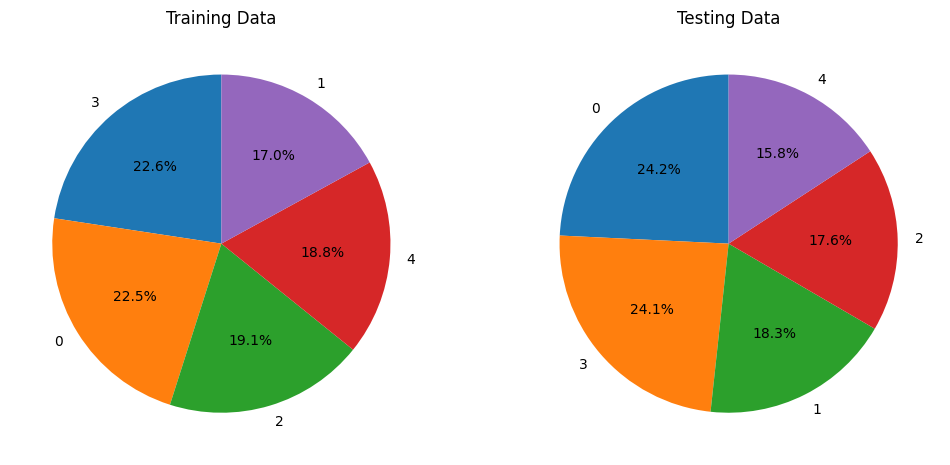

In [403]:
train_percentages = y_train[0].value_counts(normalize=True) * 100
test_percentages = y_test[0].value_counts(normalize=True) * 100
category_labels = {0: 'Business', 1: 'Entertainment', 2: 'Politics', 3: 'Sport', 4: 'Tech'}

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(train_percentages, labels=train_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Training Data')

plt.subplot(1, 2, 2)
plt.pie(test_percentages, labels=test_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Testing Data')

plt.show()

In [404]:
# Calculate prior of the given label
# gets Y as params, returns the prior of each label
def calc_prior(Y,label):
  label_counts = Y.value_counts()[label]
  size = len(Y)
  prior_probabilities = label_counts / size
  return prior_probabilities

In [405]:
num_classes = 5
for class_label in range(num_classes):
    prior_prob = calc_prior(y_train, class_label)
    print(f'Class {class_label}: Prior Probability = {prior_prob:.3f}')

Class 0: Prior Probability = 0.225
Class 1: Prior Probability = 0.170
Class 2: Prior Probability = 0.191
Class 3: Prior Probability = 0.226
Class 4: Prior Probability = 0.188


In [406]:
print(y_train.value_counts())

3    377
0    375
2    319
4    313
1    284
dtype: int64


In [407]:
def calculate_likelihood(x, y, word, label):
    x_combined = x.copy()
    x_combined["Prediction"] = y
    word_in_label = 0
    for i in range(len(x_combined)):
      if x_combined.loc[i,"Prediction"] == label:
        if x_combined.loc[i,word] != 0:
          word_in_label += x_combined.loc[i,word]
    likelihood = word_in_label/y.value_counts()[label]
    if likelihood == 0:
      ln_likelihood = -1e+12
    else:
      ln_likelihood = math.log(likelihood)
    return ln_likelihood

In [408]:
calculate_likelihood(x_train, y_train, "alien", 4)

-4.647590901872044

In [409]:
calculate_likelihood(x_train, y_train, "thunder", 4)

-1000000000000.0

In [410]:
def calc_likelihood(X, Y):
    single_business = [] # idx 0 is total no of 'the' in all business news
    total_business = 0 # total no of words in all business emails
    single_entertainment = []
    total_entertainment = 0
    single_politics = []
    total_politics = 0
    single_sport = []
    total_sport = 0
    single_tech = []
    total_tech = 0
    berno_business = [] # idx 0 is total no of 'the' in all bbusiness NOT including multiple in single news
    berno_entertainment = []
    berno_politics = []
    berno_sport = []
    berno_tech = []

    x_combined = X.copy()
    x_combined['Prediction'] = Y
    x_business = x_combined[x_combined['Prediction'] == 0]
    x_entertainment = x_combined[x_combined['Prediction'] == 1]
    x_politics = x_combined[x_combined['Prediction'] == 2]
    x_sport = x_combined[x_combined['Prediction'] == 3]
    x_tech = x_combined[x_combined['Prediction'] == 4]

    x_business = x_business.values # convert to numpy
    x_entertainment = x_entertainment.values
    x_politics = x_politics.values
    x_sport = x_sport.values
    x_tech = x_tech.values
    x_business = x_business.transpose()[:-1] # to iterate word by word and drop Pred column
    x_entertainment = x_entertainment.transpose()[:-1]
    x_politics = x_politics.transpose()[:-1]
    x_sport = x_sport.transpose()[:-1]
    x_tech = x_tech.transpose()[:-1]

    for word in x_business:
        total = word.sum()
        single_business.append(total)
        total_business += total
        berno_business.append(np.count_nonzero(word))

    for word in x_entertainment:
        total = word.sum()
        single_entertainment.append(total)
        total_entertainment += total
        berno_entertainment.append(np.count_nonzero(word))

    for word in x_politics:
        total = word.sum()
        single_politics.append(total)
        total_politics += total
        berno_politics.append(np.count_nonzero(word))

    for word in x_sport:
        total = word.sum()
        single_sport.append(total)
        total_sport += total
        berno_sport.append(np.count_nonzero(word))

    for word in x_tech:
        total = word.sum()
        single_tech.append(total)
        total_tech += total
        berno_tech.append(np.count_nonzero(word))

    return single_business, total_business, single_entertainment, total_entertainment, single_politics, total_politics, single_sport, total_sport, single_tech, total_tech, berno_business, berno_entertainment, berno_politics, berno_sport, berno_tech

In [411]:
business_numerator, business_denominator, entertainment_numerator, entertainment_denominator, politics_numerator, politics_denominator, sport_numerator, sport_denominator, tech_numerator, tech_denominator, berno_business, berno_entertainment, berno_politics, berno_sport, berno_tech = calc_likelihood(x_train, y_train)

In [412]:
def predict_multinomial(Y_train, X_test, prior):
    np.seterr(divide='ignore')
    result = [] # prediciton of each instance of X_test will be stored here
    x_test_arr = X_test.values # convert to numpy array
    vocab_len = len(X_test.columns)
    # get log prior P(Business) (Business = 0)
    prior_business = math.log10(calc_prior(Y_train, 0))

    prior_entertainment = math.log10(calc_prior(Y_train, 1))

    prior_politics = math.log10(calc_prior(Y_train, 2))

    prior_sport = math.log10(calc_prior(Y_train, 3))

    prior_tech = math.log10(calc_prior(Y_train, 4))

    # the number of occurrences of the word j in news with class yk in the training set including the multiple occurrences of the word.
    arr_business = np.array(business_numerator)
    arr_entertainment = np.array(entertainment_numerator)
    arr_politics = np.array(politics_numerator)
    arr_sport = np.array(sport_numerator)
    arr_tech = np.array(tech_numerator)

    # business_denominator total number of word j in class yk
    # calculate likelihoods
    if prior == 0:
        arr_business = arr_business/business_denominator # for business
        arr_entertainment = arr_entertainment/entertainment_denominator
        arr_politics = arr_politics/politics_denominator
        arr_sport = arr_sport/sport_denominator
        arr_tech = arr_tech/tech_denominator
    else:
        arr_business = (arr_business + prior) / (business_denominator + (prior*vocab_len))
        arr_entertainment = (arr_entertainment + prior) / (entertainment_denominator + (prior*vocab_len))
        arr_politics = (arr_politics + prior) / (politics_denominator + (prior*vocab_len))
        arr_sport = (arr_sport + prior) / (sport_denominator + (prior*vocab_len))
        arr_tech = (arr_tech + prior) / (tech_denominator + (prior*vocab_len))

    for i in range(len(arr_business)):
      if arr_business[i] > 0:
        arr_business[i] = math.log10(arr_business[i])
      else:
        arr_business[i] = -1e+12
    for i in range(len(arr_entertainment)):
      if arr_entertainment[i] > 0:
        arr_entertainment[i] = math.log10(arr_entertainment[i])
      else:
        arr_entertainment[i] = -1e+12
    for i in range(len(arr_politics)):
      if arr_politics[i] > 0:
        arr_politics[i] = math.log10(arr_politics[i])
      else:
        arr_politics[i] = -1e+12
    for i in range(len(arr_sport)):
      if arr_sport[i] > 0:
        arr_sport[i] = math.log10(arr_sport[i])
      else:
        arr_sport[i] = -1e+12
    for i in range(len(arr_tech)):
      if arr_tech[i] > 0:
        arr_tech[i] = math.log10(arr_tech[i])
      else:
        arr_tech[i] = -1e+12
    #instance how many words in the row at test
    for instance in x_test_arr:
      arr_business1 = arr_business * instance
      arr_entertainment1 = arr_entertainment * instance
      arr_politics1 = arr_politics * instance
      arr_sport1 = arr_sport * instance
      arr_tech1 = arr_tech * instance

      sums = {
        0 : np.sum(arr_business1) + prior_business,
        1 : np.sum(arr_entertainment1) + prior_entertainment,
        2 : np.sum(arr_politics1) + prior_politics,
        3 : np.sum(arr_sport1) + prior_sport,
        4 : np.sum(arr_tech1) + prior_tech
      }

      if max(sums, key=sums.get) == 0:
        result.append(0)
      elif max(sums, key=sums.get) == 1:
        result.append(1)
      elif max(sums, key=sums.get) == 2:
        result.append(2)
      elif max(sums, key=sums.get) == 3:
        result.append(3)
      else:
        result.append(4)
    return result

In [413]:
result_multinom = predict_multinomial(y_train, x_test, 0)


In [414]:
def calculate_accuracy(true_labels, predicted_labels):
    correct_predictions = 0
    total_samples = len(true_labels)

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if true_label == predicted_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    return accuracy

In [415]:
calculate_accuracy(y_test[0], result_multinom)

0.9461400359066428

In [416]:
def confusion_matrix(true_labels, predicted_labels, num_classes):
    matrix = [[0] * num_classes for _ in range(num_classes)]

    for predicted_label, true_label in zip(predicted_labels, true_labels):
        matrix[predicted_label][true_label] += 1

    return matrix

num_classes = 5

conf_matrix = confusion_matrix(y_test[0], result_multinom, num_classes)

print("Confusion Matrix:")
for row in conf_matrix:
    print(row)


Confusion Matrix:
[126, 0, 3, 1, 0]
[1, 92, 1, 0, 2]
[5, 2, 90, 0, 0]
[1, 0, 0, 133, 0]
[2, 8, 4, 0, 86]


In [417]:
result_multinom_smoothed = predict_multinomial(y_train, x_test, 1)

In [418]:
calculate_accuracy(y_test[0], result_multinom_smoothed)

0.9766606822262118

In [419]:
conf_matrix = confusion_matrix(y_test[0], result_multinom_smoothed, num_classes)

print("Confusion Matrix:")
for row in conf_matrix:
    print(row)

Confusion Matrix:
[131, 0, 1, 0, 1]
[0, 97, 0, 0, 0]
[2, 0, 96, 1, 0]
[0, 0, 0, 133, 0]
[2, 5, 1, 0, 87]


In [420]:
def calc_total(Y,label):
  label_counts = Y.value_counts()[label]
  return label_counts

In [421]:
def predict_bernoulli(Y_train, X_test, prior):
    np.seterr(divide='ignore')
    result = [] # prediciton of each instance of X_test will be stored here
    x_test_arr = X_test.values # convert to numpy array

    # get log prior P(Business) (Business = 0)
    prior_business = math.log10(calc_prior(Y_train, 0))

    prior_entertainment = math.log10(calc_prior(Y_train, 1))

    prior_politics = math.log10(calc_prior(Y_train, 2))

    prior_sport = math.log10(calc_prior(Y_train, 3))

    prior_tech = math.log10(calc_prior(Y_train, 4))

    berno_business_temp = berno_business
    berno_entertainment_temp = berno_entertainment
    berno_politics_temp = berno_politics
    berno_sport_temp = berno_sport
    berno_tech_temp = berno_tech

    # calculate likelihoods
    total_business = calc_total(Y_train, 0)
    total_entertainment = calc_total(Y_train, 1)
    total_politics = calc_total(Y_train, 2)
    total_sport = calc_total(Y_train, 3)
    total_tech = calc_total(Y_train, 4)

    for i in range(len(berno_business_temp)):
      berno_business_temp[i] += prior

    for i in range(len(berno_entertainment_temp)):
      berno_entertainment_temp[i] += prior

    for i in range(len(berno_politics_temp)):
      berno_politics_temp[i] += prior

    for i in range(len(berno_sport_temp)):
      berno_sport_temp[i] += prior

    for i in range(len(berno_tech_temp)):
      berno_tech_temp[i] += prior

    business_divided = (berno_business_temp) / (total_business + 2*prior)
    entertainment_divided = (berno_entertainment_temp) / (total_entertainment + 2*prior)
    politics_divided = (berno_politics_temp) / (total_politics + 2*prior)
    sport_divided = (berno_sport_temp ) / (total_sport + 2*prior)
    tech_divided = (berno_tech_temp) / (total_tech + 2*prior)

    for instance in x_test_arr:
      arr_business = instance.copy()
      arr_entertainment = instance.copy()
      arr_politics = instance.copy()
      arr_sport = instance.copy()
      arr_tech = instance.copy()

      arr_business = np.where(arr_business == 0, 1-business_divided, business_divided)
      arr_entertainment = np.where(arr_entertainment == 0, 1-entertainment_divided, entertainment_divided)
      arr_politics = np.where(arr_politics == 0, 1-politics_divided, politics_divided)
      arr_sport = np.where(arr_sport == 0, 1-sport_divided, sport_divided)
      arr_tech = np.where(arr_tech == 0, 1-tech_divided, tech_divided)

      arr_business = np.log10(arr_business)
      arr_entertainment = np.log10(arr_entertainment)
      arr_politics = np.log10(arr_politics)
      arr_sport = np.log10(arr_sport)
      arr_tech = np.log10(arr_tech)
      arr_business[np.isneginf(arr_business)]= -1e+12
      arr_entertainment[np.isneginf(arr_entertainment)]= -1e+12
      arr_politics[np.isneginf(arr_politics)]= -1e+12
      arr_sport[np.isneginf(arr_sport)]= -1e+12
      arr_tech[np.isneginf(arr_tech)]= -1e+12

      sums = {
        0 : np.sum(arr_business) + prior_business,
        1 : np.sum(arr_entertainment) + prior_entertainment,
        2 : np.sum(arr_politics) + prior_politics,
        3 : np.sum(arr_sport) + prior_sport,
        4 : np.sum(arr_tech) + prior_tech
      }
      if max(sums, key=sums.get) == 0:
        result.append(0)
      elif max(sums, key=sums.get) == 1:
        result.append(1)
      elif max(sums, key=sums.get) == 2:
        result.append(2)
      elif max(sums, key=sums.get) == 3:
        result.append(3)
      else:
        result.append(4)
    return result

In [422]:
result_bernoulli = predict_bernoulli(y_train, x_test, 1)

In [423]:
calculate_accuracy(y_test[0], result_bernoulli)

0.9658886894075404

In [424]:
conf_matrix = confusion_matrix(y_test[0], result_bernoulli, num_classes)

print("Confusion Matrix:")
for row in conf_matrix:
    print(row)

Confusion Matrix:
[132, 3, 4, 0, 4]
[0, 96, 0, 0, 2]
[2, 1, 94, 0, 0]
[0, 0, 0, 134, 0]
[1, 2, 0, 0, 82]
